In [59]:
#Packages
#--Web scraping packages
from bs4 import BeautifulSoup
import requests
#Pandas/numpy for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from html files. The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.¶

In [60]:
#load URLs we want to scrape into an array
BASE_URL = [
'http://www.hubertiming.com/results/2017GPTR10K'
]

In [61]:
#loading empty array for board members
board_members = []
#Loop through our URLs we loaded above
for b in BASE_URL:
    html = requests.get(b).text
    soup = BeautifulSoup(html, "html.parser")
    #identify table we want to scrape
    officer_table = soup.find('table', {"id" : "individualResults"})
    #try clause to skip any companies with missing/empty board member tables
    try:
        #loop through table, grab each of the 9 columns shown (try one of the links yourself to see the layout)
        for row in officer_table.find_all('tr'):
            cols = row.find_all('td')
            if len(cols) == 9:
               board_members.append((cols[0].text.strip(), cols[1].text.strip(), cols[2].text.strip(), cols[3].text.strip(), cols[4].text.strip(), cols[5].text.strip(), cols[6].text.strip(), cols[7].text.strip(), cols[8].text.strip() ))
    except: pass 

In [62]:
#convert output to new array, check length
board_array = np.asarray(board_members)
len(board_array)

577

In [63]:
#convert new array to dataframe
df = pd.DataFrame(board_array)

In [64]:
df.head()

,0,1,2,3,4,5,6,7,8
0,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,
3,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F


In [65]:
#rename columns, check output
df.columns = ['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun_Time', 'Team']
df.head(10)

,Place,Bib,Name,Gender,City,State,Time,Gun_Time,Team
0,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,
3,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F
5,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,39:55,
6,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,40:04,40:17,
7,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,40:05,40:09,
8,9,7,BRANDON THOMAS,M,,,40:17,40:24,COLUMBIA TEAM B
9,10,3,ERIK BJORNSTAD,M,,,40:21,40:25,COLUMBIA TEAM A


In [66]:
df1 = df.dropna(axis=0, how='any')
print(df1.head(20))

   Place  Bib                Name Gender       City State   Time Gun_Time  \
0      1  814        JARED WILSON      M     TIGARD    OR  36:21    36:24   
1      2  573  NATHAN A SUSTERSIC      M   PORTLAND    OR  36:42    36:45   
2      3  687      FRANCISCO MAYA      M   PORTLAND    OR  37:44    37:48   
3      4  623         PAUL MORROW      M  BEAVERTON    OR  38:34    38:37   
4      5  569     DEREK G OSBORNE      M  HILLSBORO    OR  39:21    39:24   
5      6  642       JONATHON TRAN      M   PORTLAND    OR  39:49    39:55   
6      7  144     GEORGE TOTONCHY      M   PORTLAND    OR  40:04    40:17   
7      8  395  BENJAMIN C CHAFFIN      M   PORTLAND    OR  40:05    40:09   
8      9    7      BRANDON THOMAS      M                   40:17    40:24   
9     10    3      ERIK BJORNSTAD      M                   40:21    40:25   
10    11   68      WITALI SPULING      M   PORTLAND    OR  40:28    40:40   
11    12  788          ANDY WEDAM      M   PORTLAND    OR  40:36    40:42   

In [67]:
df1['Gun_Time']

0        36:24
1        36:45
2        37:48
3        38:37
4        39:24
        ...   
572    1:38:34
573    1:40:32
574    1:40:34
575    1:42:01
576    1:42:10
Name: Gun_Time, Length: 577, dtype: object

# Data Analysis and Visualization
The first question to answer is, what was the average finish time (in minutes) for the runners? You need to convert the column "Gun Time" into just minutes. One way to do this is to convert the column to a list first for manipulation.

In [68]:
time_list = df1['Gun_Time'].tolist()

# Convert 'Gun Time' to minutes, handling cases with and without hours
time_mins = []
for i in time_list:
    parts = i.split(':')
    
    # If there are 3 parts, it's hours, minutes, seconds
    if len(parts) == 3:
        h, m, s = parts
        total_minutes = (int(h) * 3600 + int(m) * 60 + int(s)) / 60
    # If there are only 2 parts, it's minutes, seconds
    elif len(parts) == 2:
        m, s = parts
        total_minutes = (int(m) * 60 + int(s)) / 60
    
    time_mins.append(round(total_minutes,2))

print(time_mins)


[36.4, 36.75, 37.8, 38.62, 39.4, 39.92, 40.28, 40.15, 40.4, 40.42, 40.67, 40.7, 40.83, 41.22, 41.4, 41.82, 42.03, 42.47, 42.57, 42.8, 42.87, 42.97, 43.07, 43.6, 43.5, 43.72, 44.02, 43.87, 43.85, 43.88, 43.87, 43.87, 44.17, 44.2, 44.3, 44.28, 44.48, 45.15, 45.17, 44.77, 45.02, 45.77, 45.15, 45.37, 45.5, 45.3, 45.58, 45.53, 45.43, 45.4, 45.88, 45.57, 45.7, 46.52, 46.28, 45.98, 46.03, 45.95, 46.08, 46.12, 46.27, 46.65, 46.47, 46.55, 46.97, 48.02, 47.03, 46.88, 46.95, 47.1, 47.0, 47.82, 46.93, 47.15, 48.9, 47.53, 47.35, 47.17, 47.62, 47.22, 47.68, 47.5, 48.47, 47.75, 47.6, 47.98, 47.92, 48.2, 48.02, 48.05, 48.15, 48.15, 48.15, 48.1, 49.05, 48.33, 48.45, 49.1, 48.93, 48.67, 48.97, 49.05, 48.63, 49.6, 48.9, 48.93, 49.23, 49.2, 49.25, 49.08, 48.88, 49.9, 49.37, 50.02, 49.62, 49.43, 49.48, 49.72, 50.05, 49.87, 50.55, 49.95, 49.75, 50.07, 50.83, 50.57, 51.37, 51.48, 51.08, 51.48, 50.75, 50.75, 50.72, 50.48, 50.65, 50.75, 51.02, 51.45, 52.83, 50.95, 51.28, 50.97, 50.95, 50.97, 51.68, 51.42, 51.3

The next step is to convert the list back into a dataframe and make a new column ("Runner_mins") for runner chip times expressed in just minutes.

In [69]:
df1['Runner_mins'] = time_mins
df1.head()

,Place,Bib,Name,Gender,City,State,Time,Gun_Time,Team,Runner_mins
0,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,36.40
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F,36.75
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,,37.80
3,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,38.62
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F,39.40


The code below shows how to calculate statistics for numeric columns only in the dataframe.

In [70]:
df1.describe(include=[np.number])


,Runner_mins
count,577.000000
mean,60.631612
std,12.110718
min,36.400000
25%,51.450000
50%,59.900000
75%,68.000000
max,102.170000


Interestingly, the average chip time for all runners was ~60 mins. The fastest 10K runner finished in 36.35 mins, and the slowest runner finished in 101.30 minutes.

A boxplot is another useful tool to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers). Below are data summary statistics for the runners shown in a boxplot. For data visualization, it is convenient to first import parameters from the pylab module that comes with matplotlib and set the same size for all figures to avoid doing it for each figure.

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


This code imports the rcParams module from the pylab library and sets the figure.figsize parameter to a tuple of (15, 5).


The rcParams module is used to customize the default settings for Matplotlib plots. In this case, the figure.figsize parameter sets the width and height of the figure in inches.


By setting it to (15, 5), the figure will be 15 inches wide and 5 inches tall. This can be useful for creating plots with specific dimensions or for adjusting the size of plots in a notebook or script.

([<matplotlib.axis.XTick at 0x279627f6790>], [Text(1, 0, 'Runners')])

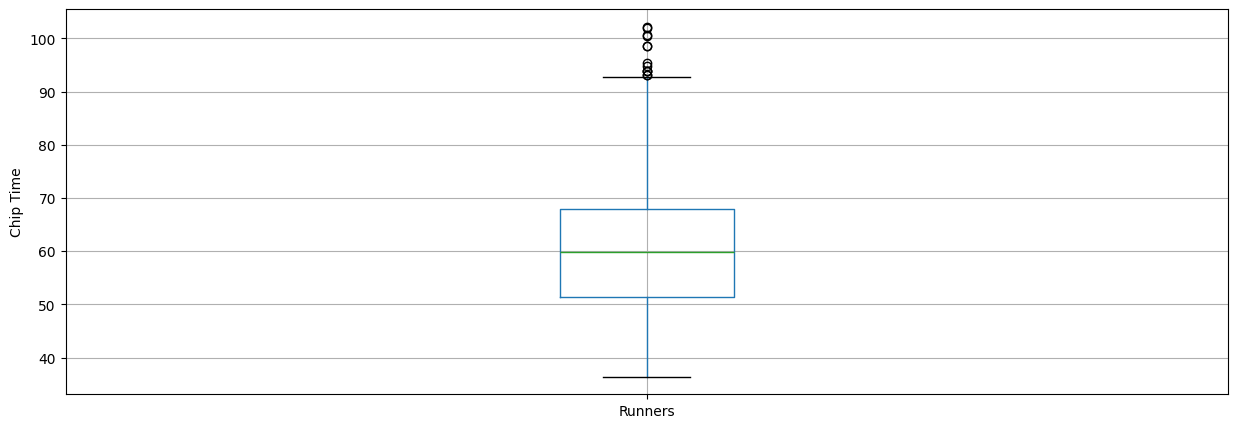

In [72]:
df1.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])


This code creates a boxplot of the 'Runner_mins' column in the 'df7' DataFrame. The 'plt.grid(True, axis='y')' line adds a grid to the y-axis of the plot. The 'plt.ylabel('Chip Time')' line sets the y-axis label to 'Chip Time'. The 'plt.xticks([1], ['Runners'])' line sets the x-axis tick labels to 'Runners'. Overall, this code is used to visualize the distribution of runner times in a race using a boxplot.

### The second question to answer is: Did the runners' finish times follow a normal distribution?
### Below is a distribution plot of runners' Gun times plotted using the seaborn library. The distribution looks almost normal.

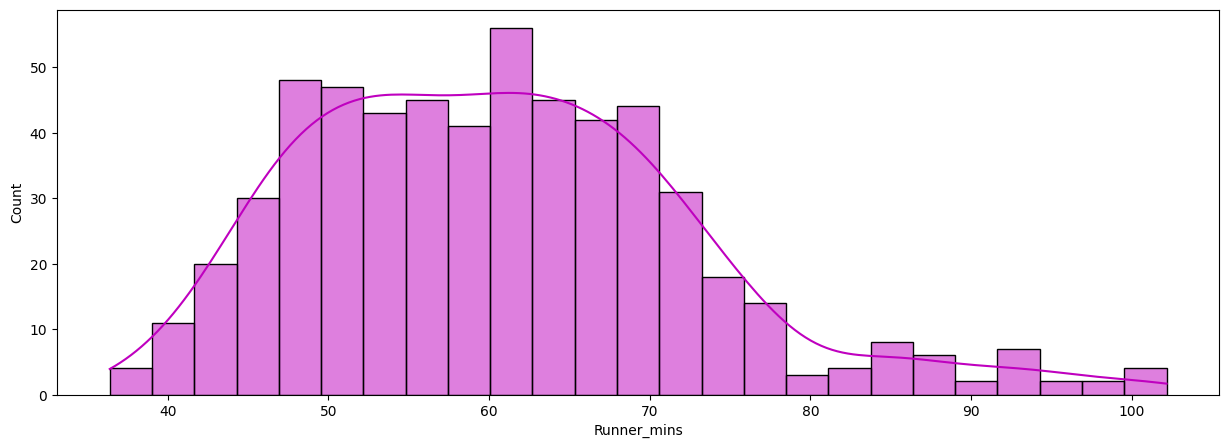

In [73]:
x = df1['Runner_mins']
# Use histplot for the histogram and kde=True to include the density estimate
ax = sns.histplot(x, kde=True, color='m', bins=25, edgecolor='black')
plt.show()

The third question deals with whether there were any performance differences between males and females of various age groups. Below is a distribution plot of chip times for males and females.

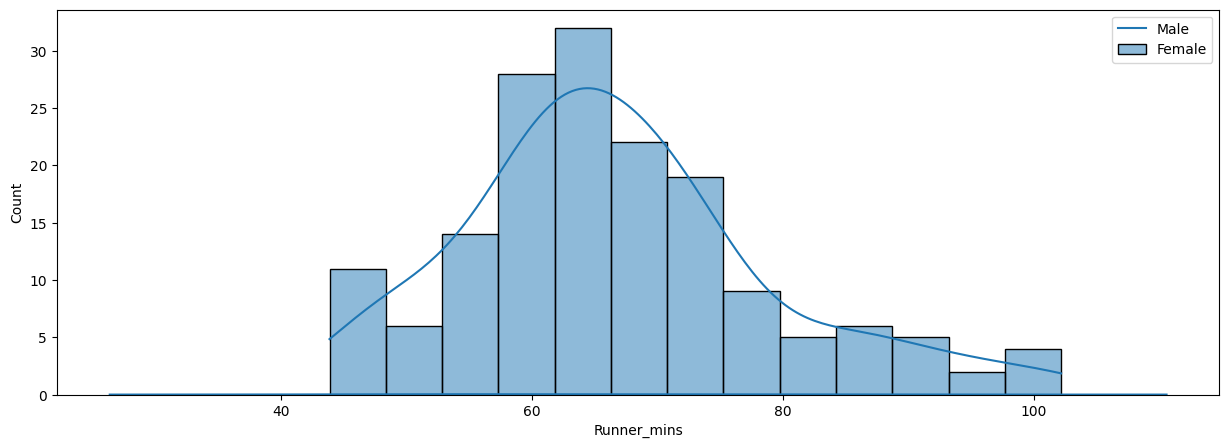

In [74]:
f_fuko = df1.loc[df1['Gender'] == 'F']['Runner_mins']
m_fuko = df1.loc[df1['Gender'] == 'M']['Runner_mins']

# Plotting histogram for females with kde
sns.histplot(f_fuko, kde=True, edgecolor='black', label='Female')

# Plotting kde for males without histogram
sns.kdeplot(m_fuko, label='Male')

# Adding legend
plt.legend()
plt.show()



The distribution indicates that females were slower than males on average. You can use the `groupby()` method to compute summary statistics for males and females separately as shown below.

In [75]:
g_stats = df1.groupby("Gender", as_index=True).describe()
print(g_stats)

       Runner_mins                                                         \
             count       mean        std    min      25%     50%      75%   
Gender                                                                      
F            163.0  66.743313  12.287684  43.87  59.2850  65.200  72.3600   
M            414.0  58.225314  11.170700  36.40  49.7875  56.475  65.4275   

                
           max  
Gender          
F       102.17  
M       100.53  


The average Gun time for all females and males was ~66 mins and ~58 mins, respectively. Below is a side-by-side boxplot comparison of male and female finish times.

Text(0.5, 0.98, '')

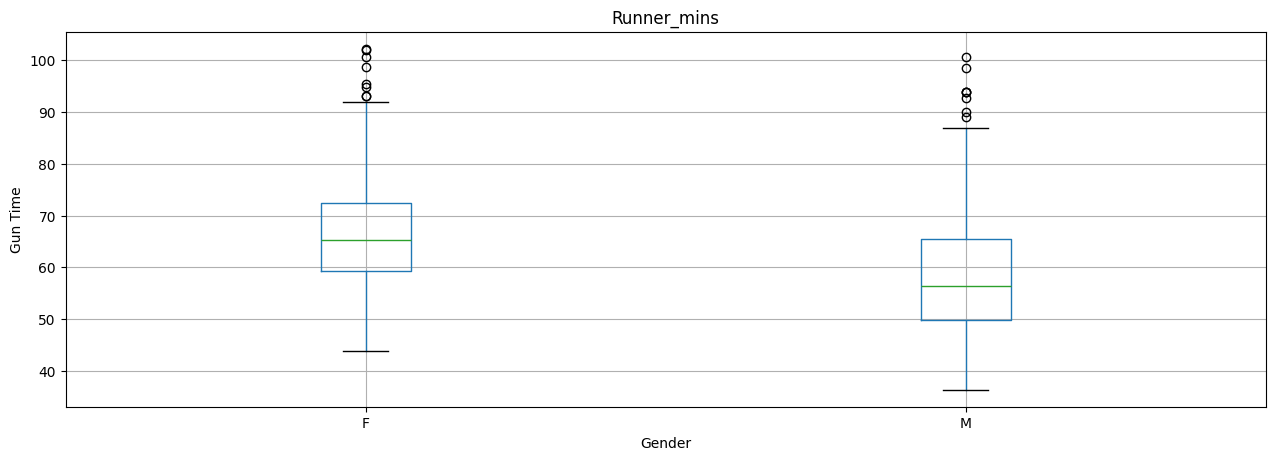

In [76]:
df1.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Gun Time')
plt.suptitle("")


# Conclusion
In this tutorial, you performed web scraping using Python. You used the Beautiful Soup library to parse html data and convert it into a form that can be used for analysis. You performed cleaning of the data in Python and created useful plots (box plots, bar plots, and distribution plots) to reveal interesting trends using Python's matplotlib and seaborn libraries. After this tutorial, you should be able to use Python to easily scrape data from the web, apply cleaning techniques and extract useful insights from the data.